### TIP!!!: put all the libraries / functions in one cell at the beginning

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 1. Reading data

In [12]:
data = pd.read_csv('regression_data1.csv', sep=",")
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


### 2. Exploring data (first impression)

In [4]:
# get the number of rows and number of columns
data.shape

(4843, 8)

In [6]:
# get information of the column types
data.info()
data.dtypes

HV1           int64
IC1           int64
IC2           int64
IC3           int64
IC4           int64
IC5           int64
AVGGIFT     float64
TARGET_D    float64
dtype: object

In [7]:
# get statistical information about the numerical columns (that would be already EDA)
data.describe()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,1163.701425,352.831922,401.913690,400.962214,446.035102,16483.862482,11.836754,15.624344
std,1032.104682,171.357547,182.660078,166.681913,176.689128,9499.090544,10.147951,12.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,548.000000,239.000000,283.000000,287.000000,325.000000,11164.000000,7.181818,10.000000
50%,809.000000,318.000000,366.000000,366.000000,411.000000,14377.000000,10.000000,13.000000
75%,1367.500000,427.000000,481.000000,482.500000,531.500000,18819.500000,14.500000,20.000000
max,5982.000000,1500.000000,1500.000000,1394.000000,1394.000000,174523.000000,450.000000,200.000000


### 3. Cleaning 

In [8]:
ordered_columns = sorted(data.columns, reverse=False)
ordered_columns

['AVGGIFT', 'HV1', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'TARGET_D']

In [13]:

# to rename we can do this but be careful!!!!!!!
#test = data.copy()
#test.columns = ordered_columns
#test.head()

# order the columns of data in this order
data = data[ordered_columns]
data.head()

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5,TARGET_D
0,15.500000,2346,420,446,468,503,14552,21.0
1,3.080000,497,350,364,357,384,11696,3.0
2,7.500000,1229,469,502,507,544,17313,20.0
3,6.700000,325,148,181,171,209,6334,5.0
4,8.785714,768,174,201,220,249,7802,10.0


In [14]:
test2 = data[["AVGGIFT","TARGET_D"]]
test2

,AVGGIFT,TARGET_D
0,15.500000,21.0
1,3.080000,3.0
2,7.500000,20.0
3,6.700000,5.0
4,8.785714,10.0
...,...,...
4838,15.500000,25.0
4839,11.857143,19.0
4840,11.333333,10.0
4841,13.000000,25.0


### 4. EDA (exploratory data analysis)

#### * Correlations

In [18]:
# look at correlations between columns
data_corr = data.corr()
data_corr = round(data_corr,2)
data_corr

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5,TARGET_D
AVGGIFT,1.00,0.14,0.12,0.13,0.13,0.13,0.14,0.52
HV1,0.14,1.00,0.70,0.74,0.73,0.75,0.74,0.13
IC1,0.12,0.70,1.00,0.95,0.97,0.93,0.81,0.12
IC2,0.13,0.74,0.95,1.00,0.95,0.97,0.88,0.13
IC3,0.13,0.73,0.97,0.95,1.00,0.97,0.83,0.13
IC4,0.13,0.75,0.93,0.97,0.97,1.00,0.87,0.14
IC5,0.14,0.74,0.81,0.88,0.83,0.87,1.00,0.14
TARGET_D,0.52,0.13,0.12,0.13,0.13,0.14,0.14,1.00


In [ ]:
### 1. WE DON'T WANT MULTICOLINEARITY --> CORRELATIONS BETWEEN FEATURES (NOT THE TARGET) BIASES THE MODEL
### 2. WE DO WANT HIGH CORRELATIONS (+-) WITH THE TARGET --> THEY ARE VALUABLE FOR PREDICTING

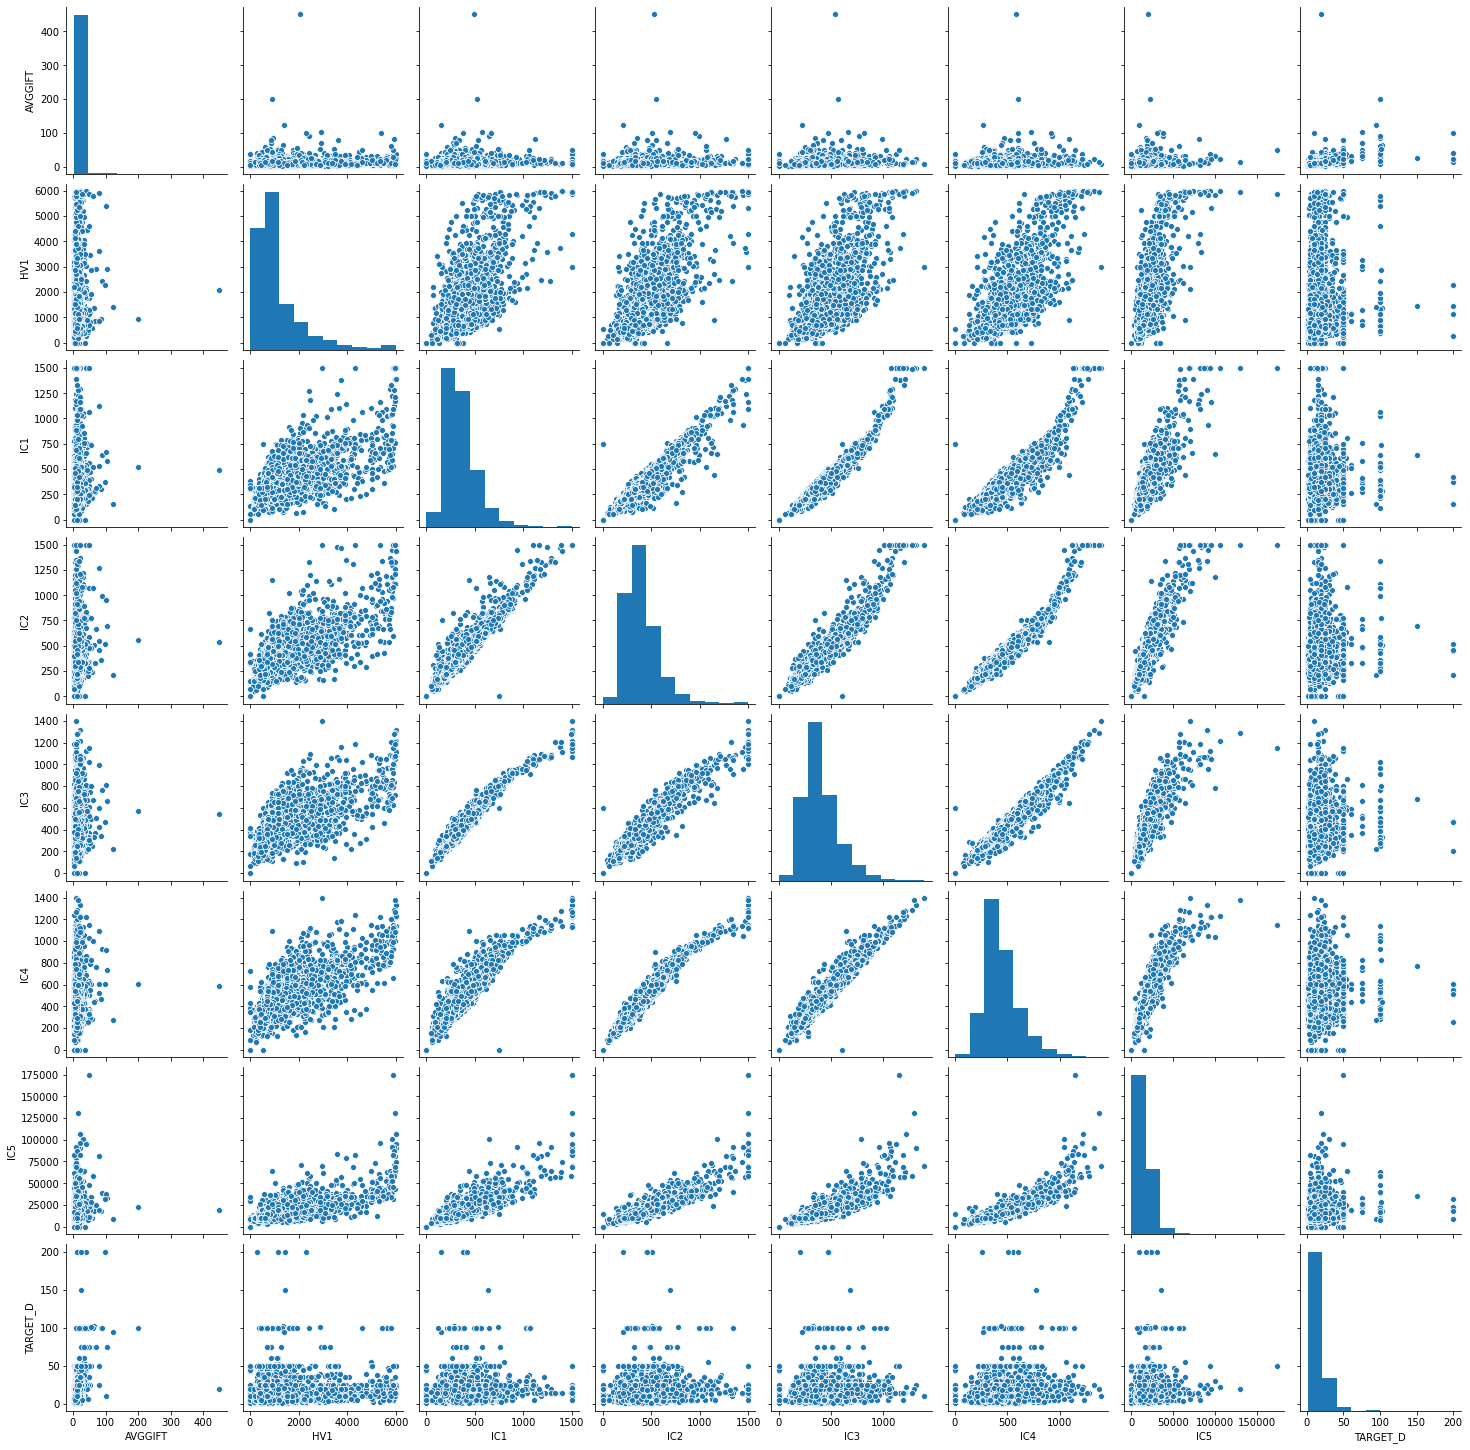

In [19]:
sns.pairplot(data)

#### * Outliers

In [20]:
# how to remove outliers of a column
data.describe()

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5,TARGET_D
count,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000,4843.000000
mean,11.836754,1163.701425,352.831922,401.913690,400.962214,446.035102,16483.862482,15.624344
std,10.147951,1032.104682,171.357547,182.660078,166.681913,176.689128,9499.090544,12.445137
min,2.260870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.181818,548.000000,239.000000,283.000000,287.000000,325.000000,11164.000000,10.000000
50%,10.000000,809.000000,318.000000,366.000000,366.000000,411.000000,14377.000000,13.000000
75%,14.500000,1367.500000,427.000000,481.000000,482.500000,531.500000,18819.500000,20.000000
max,450.000000,5982.000000,1500.000000,1500.000000,1394.000000,1394.000000,174523.000000,200.000000


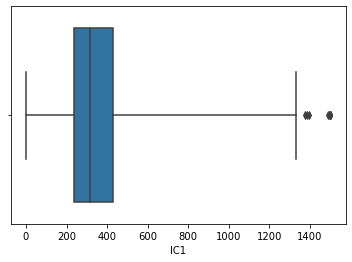

In [25]:
# first check them
sns.boxplot(x=data['IC1'],whis=5) # whis is the parameter to choose your threshold, standard is 1.5

In [26]:
iqr = np.percentile(data['IC1'],75) - np.percentile(data['IC1'],25) # data['IC1'].quantile(0.75)
iqr

188.0

In [28]:
np.percentile(data['IC1'],75)

427.0

In [29]:
# define the limits
upper_limit = np.percentile(data['IC1'],75) + 5*iqr
lower_limit = np.percentile(data['IC1'],25) - 5*iqr
upper_limit, lower_limit

(1367.0, -701.0)

In [32]:
data.shape

(4830, 8)

In [ ]:
#how many rows are the outliers
len(data[(data['IC1']<lower_limit) & (data['IC1']>upper_limit)])

In [31]:
# remove them from the data
data = data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]
data

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5,TARGET_D
0,15.500000,2346,420,446,468,503,14552,21.0
1,3.080000,497,350,364,357,384,11696,3.0
2,7.500000,1229,469,502,507,544,17313,20.0
3,6.700000,325,148,181,171,209,6334,5.0
4,8.785714,768,174,201,220,249,7802,10.0
...,...,...,...,...,...,...,...,...
4838,15.500000,701,297,335,405,468,15258,25.0
4839,11.857143,3357,284,455,343,447,24240,19.0
4840,11.333333,700,322,415,356,446,14360,10.0
4841,13.000000,601,206,225,251,289,9801,25.0


#### * Distributions

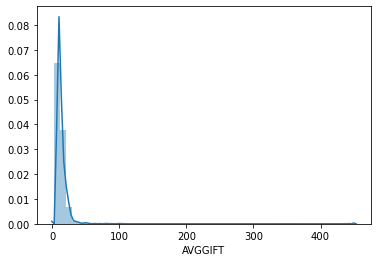

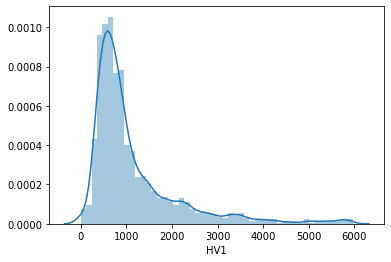

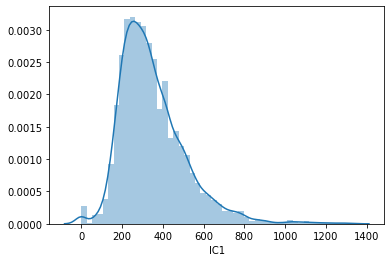

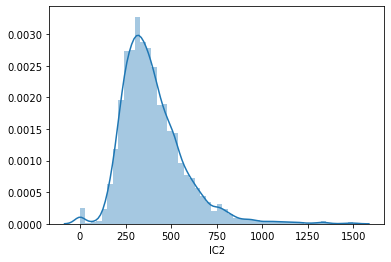

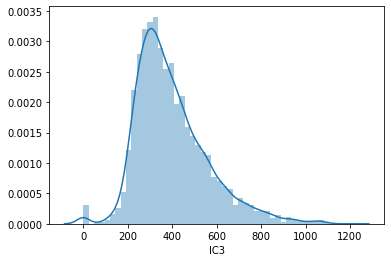

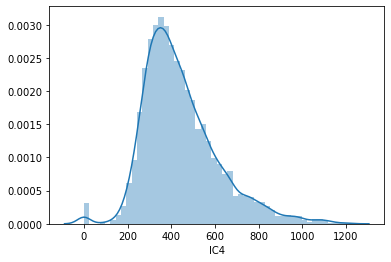

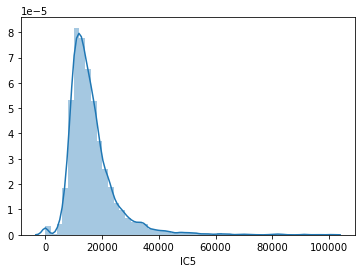

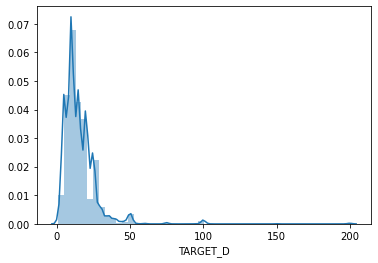

In [33]:
# checking distribution of our data (still part of the EDA)
# if the data is skewed 
for column in data.columns:
    sns.distplot(data[column])
    plt.show()

### 5. Splitting data (X-y Split)

In [38]:
y = data['TARGET_D']
X = data.drop(['TARGET_D'], axis=1)
X.head()

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5
0,15.500000,2346,420,446,468,503,14552
1,3.080000,497,350,364,357,384,11696
2,7.500000,1229,469,502,507,544,17313
3,6.700000,325,148,181,171,209,6334
4,8.785714,768,174,201,220,249,7802


### 6. Separate Numerical and Categorical

In [39]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)
X_num

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5
0,15.500000,2346,420,446,468,503,14552
1,3.080000,497,350,364,357,384,11696
2,7.500000,1229,469,502,507,544,17313
3,6.700000,325,148,181,171,209,6334
4,8.785714,768,174,201,220,249,7802
...,...,...,...,...,...,...,...
4838,15.500000,701,297,335,405,468,15258
4839,11.857143,3357,284,455,343,447,24240
4840,11.333333,700,322,415,356,446,14360
4841,13.000000,601,206,225,251,289,9801


### 7. Scaling data / Feature transformation

Standardizing (mean=0, stdev=1) and Normalizing (rescale between 0 and 1)

A bit of theory about why to transform them into a Normal [here](https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd)

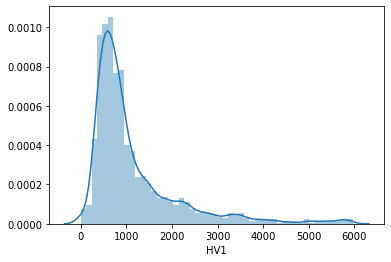

In [34]:
sns.distplot(data['HV1'])
plt.show()

#### * Normalized data (MinMax)

In [ ]:
### Instead USE THIS ONE

In [40]:
transformer = MinMaxScaler().fit(X_num) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(X_num) #This is a an array of arrays
print(x_minmax.shape)

(4830, 7)


In [41]:
x_minmax

array([[0.02956885, 0.39329422, 0.31602709, ..., 0.38967527, 0.41331142,
        0.14475569],
       [0.00182948, 0.08331936, 0.26335591, ..., 0.29725229, 0.31552999,
        0.11634569],
       [0.0117013 , 0.20603521, 0.35289691, ..., 0.42214821, 0.44700082,
        0.17222067],
       ...,
       [0.02026283, 0.11735122, 0.24228743, ..., 0.29641965, 0.36647494,
        0.14284577],
       [0.02398524, 0.1007544 , 0.15500376, ..., 0.20899251, 0.23746919,
        0.09749523],
       [0.03498065, 0.15406538, 0.31978932, ..., 0.46461282, 0.5727198 ,
        0.25648576]])

In [42]:
X_num_norm = pd.DataFrame(x_minmax,columns=X_num.columns)
X_num_norm.head() 

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5
0,0.029569,0.393294,0.316027,0.297333,0.389675,0.413311,0.144756
1,0.001829,0.083319,0.263356,0.242667,0.297252,0.315530,0.116346
2,0.011701,0.206035,0.352897,0.334667,0.422148,0.447001,0.172221
3,0.009915,0.054484,0.111362,0.120667,0.142381,0.171734,0.063007
4,0.014573,0.128751,0.130926,0.134000,0.183181,0.204601,0.077610


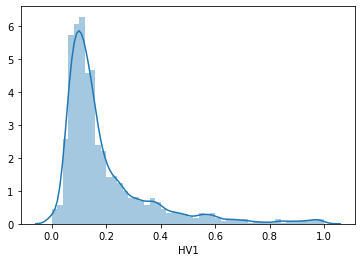

In [43]:
sns.distplot(X_num_norm['HV1'])

#### * Stardardized data

In [44]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)

In [45]:
X_num_stand = pd.DataFrame(x_standardized, columns=X_num.columns)
X_num_stand.head()

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5
0,0.362868,1.184185,0.434880,0.270403,0.428489,0.343932,-0.202492
1,-0.862582,-0.649977,0.001132,-0.201154,-0.258792,-0.348350,-0.535531
2,-0.426472,0.076149,0.738504,0.592442,0.669967,0.582450,0.119469
3,-0.505406,-0.820597,-1.250542,-1.253532,-1.410454,-1.366412,-1.160796
4,-0.299614,-0.381152,-1.089436,-1.138518,-1.107059,-1.133712,-0.989612


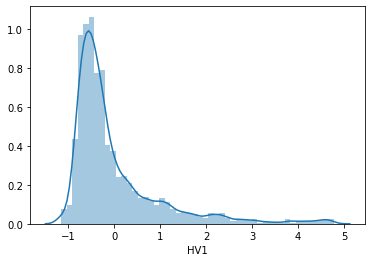

In [46]:
sns.distplot(X_num_stand['HV1'])

#### * Log transformation

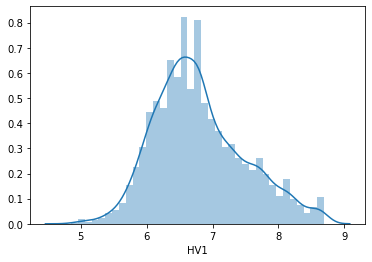

In [47]:
data1 = data.copy()

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

#data1['HV1'] = data1['HV1'].apply(log_transfom_clean)

data1['HV1'] = list(map(log_transfom_clean, data1['HV1']))

data1['HV1'] = data1['HV1'].fillna(np.mean(data1['HV1']))

sns.distplot(data1['HV1'])
plt.show()

#### * Box-Cox transformation

In [48]:
# boxcox do not work on negative numbers
data2 = data.copy()
stats.boxcox(data2['IC1'])

ValueError: Data must be positive.

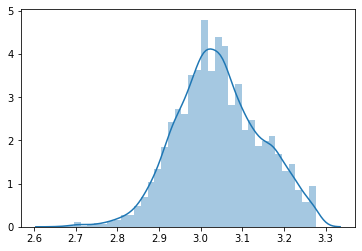

In [49]:
# Since this is median household income, we can filter out negative values:
# if you do not want to lose this data, replace it with the mean of the column

data2['HV1'] = np.where(data['HV1']<=0, np.NAN, data['HV1']) # data['HV1'].mean()

data2['HV1'] = data2['HV1'].fillna(data['HV1'].mean())

transformed_data, _ci = stats.boxcox(data2['HV1'])

sns.distplot(transformed_data)
plt.show()

In [ ]:
###### IMPORTANT: YOU HAVE TO SCALE THE NEW DATA SO THE MODEL WILL BE ABLE TO GENERATE CORRECT PREDICTIONS; ALSO, IF YOU SCALE YOUR TARGET VARIABLE, YOU HAVE TO UNSCALE IT AFTER THE PREDICTIONS
###### ALSO IMPORTANT: NORMALIZER WORKS COLUMN WISE, WHILE STANDARDSCALER AND MINMAXSCALER WORKS ROW WISE

### 8. MODELING

### Linear Regression
The most basic Machine Learning model. Easy to interpret and very useful. [Here](https://balavenkatesh.medium.com/ten-minutes-to-learn-linear-regression-for-dummies-5469038f4781) is a recommended read about it. <br><br>
These are the main assumptions about the model:

* Independence of the observations - the rows do not depend on each other;
* The relationship between variables and target is linear - if we plot features vs target of the population we'd see something like a line;
* Errors are normally distributed - if we plot the residuals we'd see something like a bell shape;
* No/Little Multicolinearity - no features highly correlated with each other;
* Homoscedasticity of errors - equal variance of the residuals around the regression line;


Linear Regression assumptions explained with example [here](https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b).

The linear model has the formula:
* y = a * X + b
<br>

#### Where:
y is your prediction;<br>
b is the 'intercept': where the regression line crosses the y axis;<br>
a is the 'coeficient': it's what your model will calculate;<br>
X is a value from a columns.

In [50]:
X_num

,AVGGIFT,HV1,IC1,IC2,IC3,IC4,IC5
0,15.500000,2346,420,446,468,503,14552
1,3.080000,497,350,364,357,384,11696
2,7.500000,1229,469,502,507,544,17313
3,6.700000,325,148,181,171,209,6334
4,8.785714,768,174,201,220,249,7802
...,...,...,...,...,...,...,...
4838,15.500000,701,297,335,405,468,15258
4839,11.857143,3357,284,455,343,447,24240
4840,11.333333,700,322,415,356,446,14360
4841,13.000000,601,206,225,251,289,9801


In [51]:
lm = LinearRegression() # start the model object {'coef': []}
lm.fit(X_num,y) # fit your regression line / train the model {'coef': [coeficients]}
# lm.coef_ # lm.intercept_

LinearRegression()

In [52]:
# evaluating sklearn's LR model
predictions = lm.predict(X) # predict some values
rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.27
RMSE: 10.626625586331294
MAE: 5.663597368102161
